# Deep Learning Models for classification of EEG dataset


In [ ]:
# Prepared By Abdul Qayyum
# Date=14-7-2019

In [1]:

# Loading the dataset
# Dataset is provided in this tutorial. 
You can process your won dataset and run the model 
fname = "EEG Eye State.txt"
with open(fname) as f:
    content = f.readlines()

content = [x.strip() for x in content] 
content = [x.split(",") for x in content]

In [2]:
# Dataset should be converted into numpy array for deep learning models
# Converting list to numpy array

import numpy as np

content = np.array(content, dtype = 'float32')

In [3]:
# Shuffling the dataset

import random
random.shuffle(content)

In [4]:
# Creating X and Y
x = content[:, :-1]
y = np.array(content[:, -1], dtype = 'int32')

In [5]:
x[0]

array([4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92,
       4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9 , 4393.85],
      dtype=float32)

In [6]:
y[0]

0

# Normalization of data
Normalization of data is required before using it on deep neural Nueral Networks

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
scaler.fit(x)
x_new = scaler.transform(x)

In [9]:
data_mean = x.mean()
data_std = x.std()
x = (x - data_mean)/data_std

In [10]:
(x_train, x_test) = x[:11000], x[11000:]
(y_train, y_test) = y[:11000], y[11000:]

# Training on  long short term memory (LSTM) model

# Creating 3D array dataset for LSTM model
# dataset for lstm and orther 1D signal based on 3D tensor.
# you shoudl provide tempral information, number of channel and number of classes
# dataset=samplesxfeaturesxchannels
# dataset=11000x14x1
# number of classes

In [13]:
X_train = np.asarray(np.reshape(x_train, (x_train.shape[0], 14, 1)))
X_test = np.asarray(np.reshape(x_test, (x_test.shape[0], 14, 1)))

In [14]:
from keras.layers import Dense, Dropout, CuDNNLSTM, Embedding, LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [16]:
model1 = Sequential()
model1.add(LSTM(256,input_shape=(14, 1), return_sequences=True))
model1.add(LSTM(256))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

W0714 10:06:20.872536 10284 deprecation_wrapper.py:119] From C:\Users\moona\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 10:06:20.885502 10284 deprecation_wrapper.py:119] From C:\Users\moona\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0714 10:06:20.889492 10284 deprecation.py:323] From C:\Users\moona\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 14, 256)           264192    
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'LSTM.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model1.fit(X_train, y_train, epochs = 100, batch_size=256, validation_split = 0.1, callbacks = [checkpointer], verbose = 2, shuffle = True)

W0714 10:06:44.772954 10284 deprecation_wrapper.py:119] From C:\Users\moona\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 9900 samples, validate on 1100 samples
Epoch 1/100
 - 8s - loss: 0.6915 - acc: 0.5228 - val_loss: 0.7011 - val_acc: 0.4909

Epoch 00001: val_loss improved from inf to 0.70114, saving model to LSTM.weights.best.hdf5
Epoch 2/100
 - 7s - loss: 0.6896 - acc: 0.5333 - val_loss: 0.6876 - val_acc: 0.5282

Epoch 00002: val_loss improved from 0.70114 to 0.68760, saving model to LSTM.weights.best.hdf5
Epoch 3/100
 - 7s - loss: 0.6680 - acc: 0.5997 - val_loss: 0.6747 - val_acc: 0.5291

Epoch 00003: val_loss improved from 0.68760 to 0.67472, saving model to LSTM.weights.best.hdf5
Epoch 4/100
 - 7s - loss: 0.6453 - acc: 0.6363 - val_loss: 0.6649 - val_acc: 0.5482

Epoch 00004: val_loss improved from 0.67472 to 0.66485, saving model to LSTM.weights.best.hdf5
Epoch 5/100
 - 7s - loss: 0.6455 - acc: 0.6152 - val_loss: 0.6768 - val_acc: 0.5518

Epoch 00005: val_loss did not improve from 0.66485
Epoch 6/100
 - 7s - loss: 0.6160 - acc: 0.6815 - val_loss: 0.7218 - val_acc: 0.5773

Epoch 00006: va

 - 8s - loss: 0.4203 - acc: 0.8017 - val_loss: 0.5623 - val_acc: 0.7082

Epoch 00055: val_loss did not improve from 0.52507
Epoch 56/100
 - 8s - loss: 0.4306 - acc: 0.7930 - val_loss: 0.5636 - val_acc: 0.7318

Epoch 00056: val_loss did not improve from 0.52507
Epoch 57/100
 - 8s - loss: 0.4129 - acc: 0.8077 - val_loss: 0.5946 - val_acc: 0.6727

Epoch 00057: val_loss did not improve from 0.52507
Epoch 58/100
 - 8s - loss: 0.4267 - acc: 0.7929 - val_loss: 0.5476 - val_acc: 0.7209

Epoch 00058: val_loss did not improve from 0.52507
Epoch 59/100
 - 8s - loss: 0.4217 - acc: 0.7956 - val_loss: 0.5062 - val_acc: 0.7391

Epoch 00059: val_loss improved from 0.52507 to 0.50621, saving model to LSTM.weights.best.hdf5
Epoch 60/100
 - 8s - loss: 0.3986 - acc: 0.8135 - val_loss: 0.5230 - val_acc: 0.7482

Epoch 00060: val_loss did not improve from 0.50621
Epoch 61/100
 - 8s - loss: 0.4053 - acc: 0.8086 - val_loss: 0.5262 - val_acc: 0.7436

Epoch 00061: val_loss did not improve from 0.50621
Epoch 62/1

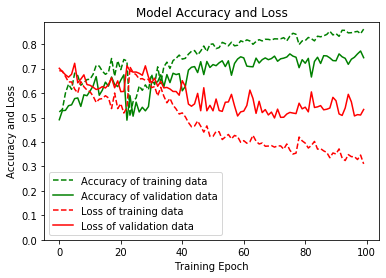

In [21]:
import matplotlib.pyplot as plt
# summarize history for accuracy and loss
plt.figure(figsize=(6, 4))
plt.plot(hist.history['acc'], "g--", label="Accuracy of training data")
plt.plot(hist.history['val_acc'], "g", label="Accuracy of validation data")
plt.plot(hist.history['loss'], "r--", label="Loss of training data")
plt.plot(hist.history['val_loss'], "r", label="Loss of validation data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [22]:
score = model1.evaluate(X_test, y_test, verbose=1)
print("Accuracy: ", score[1])

3980/3980 [==============================] - 2s 448us/step
Accuracy:  0.714824120603015


In [25]:
from sklearn import metrics

In [26]:
predict1 =  [1 if a>0.5 else 0 for a in model1.predict(X_test)]

In [27]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict1), metrics.precision_score(y_test, predict1),metrics.recall_score(y_test, predict1),metrics.f1_score(y_test, predict1)))


Accuracy = 0.714824120603015
Precision = 0.767266395821242
Recall = 0.6429961089494164
F1 Score = 0.6996559936491135


# Another Model  based on 1DCNN architecture

In [11]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Reshape, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dropout, Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [12]:
# same dataset used in this model
X_train = np.asarray(np.reshape(x_train, (x_train.shape[0], 14, 1)))
X_test = np.asarray(np.reshape(x_test, (x_test.shape[0], 14, 1)))

In [13]:
temporal_dimension = X_train.shape[1]
num_channels =X_train.shape[2]
num_classes = 2
X_train.shape[2]

1

In [14]:
print(X_train.shape)

(11000, 14, 1)


In [15]:
temporal_dimension

14

In [16]:
num_channels =X_train.shape[2]
print(num_channels)

1


In [17]:
input_shape = temporal_dimension

In [18]:
model = Sequential()
model.add(Conv1D(100,2, activation='relu', input_shape=(temporal_dimension, num_channels)))
model.add(Conv1D(100, 2, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(160, 2, activation='relu'))
model.add(Conv1D(160, 2, activation='relu'))
model.add(GlobalAveragePooling1D())
#model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='sigmoid'))
print(model.summary())

W0714 11:20:04.142014 23568 deprecation_wrapper.py:119] From C:\Users\moona\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 11:20:04.161777 23568 deprecation_wrapper.py:119] From C:\Users\moona\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 11:20:04.163298 23568 deprecation_wrapper.py:119] From C:\Users\moona\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 11:20:04.197792 23568 deprecation_wrapper.py:119] From C:\Users\moona\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0714 11:20:04.243375 23568 deprecation_wrapper.py:119] From C:\Users\moona\Ana

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 13, 100)           300       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 100)           20100     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 100)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3, 160)            32160     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 2, 160)            51360     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 160)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 160)               0         
__________

In [19]:
# labels converted into categorail for two classes 
y_train = np_utils.to_categorical(y_train, num_classes)

W0714 11:20:15.601167 23568 deprecation_wrapper.py:119] From C:\Users\moona\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 11:20:15.619463 23568 deprecation_wrapper.py:119] From C:\Users\moona\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0714 11:20:15.622763 23568 deprecation.py:323] From C:\Users\moona\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 9900 samples, validate on 1100 samples
Epoch 1/5
9900/9900 [==============================] - 2s 191us/step - loss: 0.6935 - acc: 0.5304 - val_loss: 0.6923 - val_acc: 0.5091
Epoch 2/5
9900/9900 [==============================] - 1s 116us/step - loss: 0.6884 - acc: 0.5307 - val_loss: 0.7126 - val_acc: 0.5082
Epoch 3/5
9900/9900 [==============================] - 1s 112us/step - loss: 0.6687 - acc: 0.5676 - val_loss: 0.6776 - val_acc: 0.5495
Epoch 4/5
9900/9900 [==============================] - 1s 110us/step - loss: 0.6491 - acc: 0.6034 - val_loss: 0.6853 - val_acc: 0.5759
Epoch 5/5
9900/9900 [==============================] - 1s 106us/step - loss: 0.6255 - acc: 0.6472 - val_loss: 0.6632 - val_acc: 0.6100

--- Learning curve of model training ---



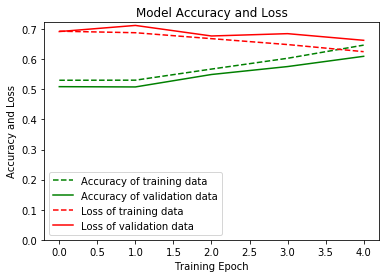

In [20]:
model.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 128
EPOCHS = 5 # You can increase number of epoches and batch size

history = model.fit(X_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      validation_split=0.1,
                      verbose=1)
print("\n--- Learning curve of model training ---\n")

# summarize history for accuracy and loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], "g--", label="Accuracy of training data")
plt.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
plt.plot(history.history['loss'], "r--", label="Loss of training data")
plt.plot(history.history['val_loss'], "r", label="Loss of validation data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [21]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

In [22]:
#print(y_test.shape)
y_test = np_utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(3980, 2)


3980/3980 [==============================] - 0s 86us/step

Accuracy on test data: 0.59

Loss on test data: 0.68

--- Confusion matrix for test data ---



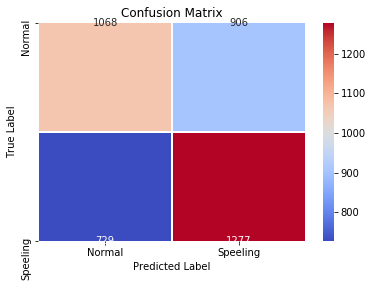


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.59      0.54      0.57      1974
           1       0.58      0.64      0.61      2006

    accuracy                           0.59      3980
   macro avg       0.59      0.59      0.59      3980
weighted avg       0.59      0.59      0.59      3980



In [23]:
import seaborn as sns
x_test = X_test.astype("float32")
y_test = y_test.astype("float32")

#y_test = np_utils.to_categorical(y_test, num_classes)

score = model.evaluate(x_test, y_test, verbose=1)

print("\nAccuracy on test data: %0.2f" % score[1])
print("\nLoss on test data: %0.2f" % score[0])

# %%

print("\n--- Confusion matrix for test data ---\n")

y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)
LABELS=["Normal",
          "Speeling"]
show_confusion_matrix(max_y_test, max_y_pred_test)

# %%

print("\n--- Classification report for test data ---\n")

print(classification_report(max_y_test, max_y_pred_test))

# GRU model for EEG classification

In [25]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Activation, Dropout, GRU
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.optimizers import SGD
import math

In [27]:
# same dataset used in this model
X_train = np.asarray(np.reshape(x_train, (x_train.shape[0], 14, 1)))
X_test = np.asarray(np.reshape(x_test, (x_test.shape[0], 14, 1)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_10 (GRU)                 (None, 14, 50)            7800      
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 50)            0         
_________________________________________________________________
gru_11 (GRU)                 (None, 14, 50)            15150     
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 50)            0         
_________________________________________________________________
gru_12 (GRU)                 (None, 14, 50)            15150     
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 50)            0         
_________________________________________________________________
gru_13 (GRU)                 (None, 50)                15150     
__________

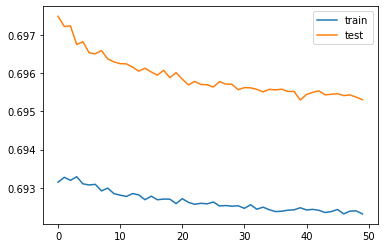

In [31]:
# The GRU architecture
modelGRU = Sequential()
# First GRU layer with Dropout regularisation
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh'))
#print(modelGRU.get_input_at())
modelGRU.add(Dropout(0.2))
print(modelGRU)
# Second GRU layer
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh'))
modelGRU.add(Dropout(0.2))
# Third GRU layer
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh'))
modelGRU.add(Dropout(0.2))
# Fourth GRU layer
modelGRU.add(GRU(units=50, activation='tanh'))
modelGRU.add(Dropout(0.2))
# The output layer
modelGRU.add(Dense(units=2))
modelGRU.add(Activation('sigmoid'))
modelGRU.summary()
# Compiling the RNN
modelGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='binary_crossentropy',metrics=['accuracy'])
# Fitting to the training set
history=modelGRU.fit(X_train,y_train,epochs=50,batch_size=150,validation_data=(X_test, y_test), verbose=2, shuffle=False)
#history=model2.fit(train_X,train_y,epochs=50,batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [32]:
# evluation on the test set
scores = modelGRU.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 50.40%
